In [ ]:
#Importing path
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/BDMH_2_Assign")
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/BDMH_2_Assign'

In [ ]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
#Reading Train.csv file & saving 'Label' in y variable
df = pd.read_csv('train.csv')
y=df.iloc[:,1]
y

0       0
1       0
2       0
3       0
4       0
       ..
8388    1
8389    1
8390    1
8391    1
8392    1
Name:  Label, Length: 8393, dtype: int64

In [ ]:
#Reading train_AAB Pfeature generated file & saving dataset In 'X' variable after replacing NaN value with 0
dataset=pd.read_csv("train_AAB.csv")
X=dataset.fillna(0)
X


,A1,C1,D1,E1,F1,G1,H1,I1,K1,L1,...,M25,N25,P25,Q25,R25,S25,T25,V25,W25,Y25
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8389,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8390,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8391,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Splitting dataset into training and testing data in 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [ ]:
## Part 2 NOw lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import regularizers

In [ ]:
# create model
model = Sequential()
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])# by default adam add learning rate=0.1

In [ ]:
#Importing tensor flow
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# Early stopping
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
#Splited data is fited into model
model_history = model.fit(X_train,y_train,validation_split=0.20, batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
538/538 [==============================] - 7s 8ms/step - loss: 0.6164 - accuracy: 0.6459 - val_loss: 0.5419 - val_accuracy: 0.7379
Epoch 2/1000
538/538 [==============================] - 4s 8ms/step - loss: 0.4821 - accuracy: 0.7693 - val_loss: 0.5298 - val_accuracy: 0.7424
Epoch 3/1000
538/538 [==============================] - 3s 5ms/step - loss: 0.3330 - accuracy: 0.8620 - val_loss: 0.5198 - val_accuracy: 0.7640
Epoch 4/1000
538/538 [==============================] - 2s 5ms/step - loss: 0.1888 - accuracy: 0.9306 - val_loss: 0.7035 - val_accuracy: 0.7573
Epoch 5/1000
538/538 [==============================] - 2s 5ms/step - loss: 0.0983 - accuracy: 0.9665 - val_loss: 0.7806 - val_accuracy: 0.7655
Epoch 6/1000
538/538 [==============================] - 3s 5ms/step - loss: 0.0472 - accuracy: 0.9864 - val_loss: 1.0406 - val_accuracy: 0.7759
Epoch 7/1000
538/538 [==============================] - 3s 6ms/step - loss: 0.0376 - accuracy: 0.9862 - val_loss: 1.2585 - val_accuracy:

In [ ]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


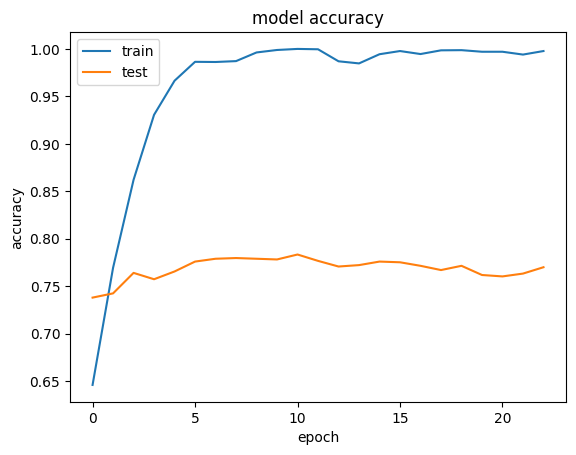

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

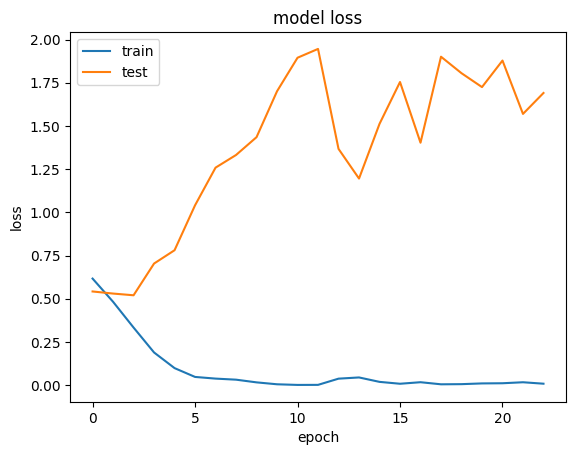

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
## Making the prediction and evaluation the model

# Prediction the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred >=0.5)
y_pred


53/53 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[632, 202],
       [198, 647]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7617629541393687

In [ ]:
## get the weights
model.get_weights()

In [ ]:
#Reading Pfeature generated file 'test_AAB'
data_tets=pd.read_csv("test_AAB.csv")
df_test=data_tets.fillna(0)
df_test

,A1,C1,D1,E1,F1,G1,H1,I1,K1,L1,...,M25,N25,P25,Q25,R25,S25,T25,V25,W25,Y25
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1594,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1595,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1596,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Fitting tha test data to predict
y_preds2=model.predict(df_test)
y_preds2 = (y_preds2 >=0.5)


50/50 [==============================] - 0s 2ms/step


In [ ]:
# Coverting True/False into 0 & 1 respectively
ypred3 = []
for x in y_preds2:
  ypred3.append(int(x))
ypred3

In [ ]:
#Reading test file
df_test=pd.read_csv('test.csv')
df_test

,ID,Sequence
0,10001,AAAEQLKTTRNAYHQKY
1,10002,AAALAPTQTRAGPHSL
2,10003,AADLALATVNEL
3,10004,AAHPDKRGEDQAEGLPEEVRG
4,10005,AAKPKRAKASKKSTDHPKYS
...,...,...
1593,11594,YVLSSLHIYWGKEDDYGSNH
1594,11595,YVPDDDWFCPNCQ
1595,11596,YYKDKATFGCHDGYS
1596,11597,YYNKVPVEKRVFKNL


In [ ]:
#Extracting 'ID' from test data file
label_test=df_test['ID']
label_test

0       10001
1       10002
2       10003
3       10004
4       10005
        ...  
1593    11594
1594    11595
1595    11596
1596    11597
1597    11598
Name: ID, Length: 1598, dtype: int64

In [ ]:
# Combine the ID colums with predicted output columns

df_test_1 = pd.DataFrame(data = label_test, columns = ['ID'])
df_test_1['Label'] = ypred3
df_test_1

,ID,Label
0,10001,1
1,10002,0
2,10003,0
3,10004,0
4,10005,1
...,...,...
1593,11594,1
1594,11595,1
1595,11596,0
1596,11597,1


In [ ]:
# Convertinng predicted data into csv file
df_test_1.to_csv('test_aab_DL_2.csv',index=False)